# 1.Perform exploratory data analysis (EDA) 

In [118]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd  
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import make_pipeline  
from sklearn.model_selection import train_test_split  


 
%matplotlib inline

In [3]:
# load the dataset
df = pd.read_csv(r"/Users/shreyasingh/Downloads/MLR/ToyotaCorolla - MLR.csv")
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.nunique()

Price         236
Age_08_04      77
KM           1263
Fuel_Type       3
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
dtype: int64

In [6]:
# checking for the missing value
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [8]:
df['Fuel_Type'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [9]:
df['Automatic'].value_counts()

0    1356
1      80
Name: Automatic, dtype: int64

In [10]:
# droping the cylinders column as it is unniform distribution and not contributing towards data.
df.drop(columns='Cylinders', inplace=True)

In [11]:
df.shape

(1436, 10)

In [12]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Gears         int64
Weight        int64
dtype: object

In [13]:
# print the duplicated rows
df[df.duplicated(keep= False)]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,5,1320


In [14]:
# droping the duplicated rows
df.drop_duplicates(inplace=True)

In [15]:
# reseting the index after droping the duplicates
df = df.reset_index()
df

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,Petrol,86,0,1300,3,5,1025
1431,1432,10845,72,19000,Petrol,86,0,1300,3,5,1015
1432,1433,8500,71,17016,Petrol,86,0,1300,3,5,1015
1433,1434,7250,70,16916,Petrol,86,0,1300,3,5,1015


In [16]:
df= df.drop(columns='index')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,5,1015


## outliers detection

<Axes: >

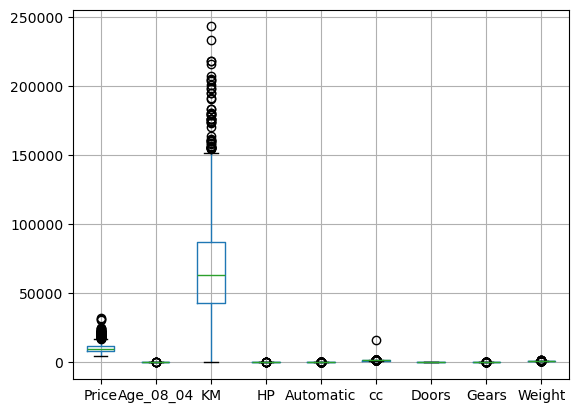

In [18]:
df.boxplot()

In [19]:
# function for outliners
def outlier_detection(data,columns):
    for col in columns:
        Q1= data[col].quantile(0.25)
        Q3= data[col].quantile(0.75)
        IQR= Q3-Q1
        Lower = Q1-1.5*IQR
        Upper = Q3+1.5*IQR
        data[col]=np.where(data[col]>Upper,Upper,np.where(data[col]<Lower,Lower,data[col]))
    return data

In [20]:
# replacing outliers with Lower or Upper extreme
outlier_detection(df,['Price'])
outlier_detection(df,['Age_08_04'])
outlier_detection(df,['KM'])
outlier_detection(df,['HP'])
outlier_detection(df,['Automatic'])
outlier_detection(df,['cc'])
outlier_detection(df,['Doors'])
outlier_detection(df,['Gears'])
outlier_detection(df,['Weight'])


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500.0,23.0,46986.0,Diesel,90.0,0.0,1900.0,3.0,5.0,1152.5
1,13750.0,23.0,72937.0,Diesel,90.0,0.0,1900.0,3.0,5.0,1152.5
2,13950.0,24.0,41711.0,Diesel,90.0,0.0,1900.0,3.0,5.0,1152.5
3,14950.0,26.0,48000.0,Diesel,90.0,0.0,1900.0,3.0,5.0,1152.5
4,13750.0,30.0,38500.0,Diesel,90.0,0.0,1900.0,3.0,5.0,1152.5
...,...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,20544.0,Petrol,86.0,0.0,1300.0,3.0,5.0,1025.0
1431,10845.0,72.0,19000.0,Petrol,86.0,0.0,1300.0,3.0,5.0,1015.0
1432,8500.0,71.0,17016.0,Petrol,86.0,0.0,1300.0,3.0,5.0,1015.0
1433,7250.0,70.0,16916.0,Petrol,86.0,0.0,1300.0,3.0,5.0,1015.0


<Axes: >

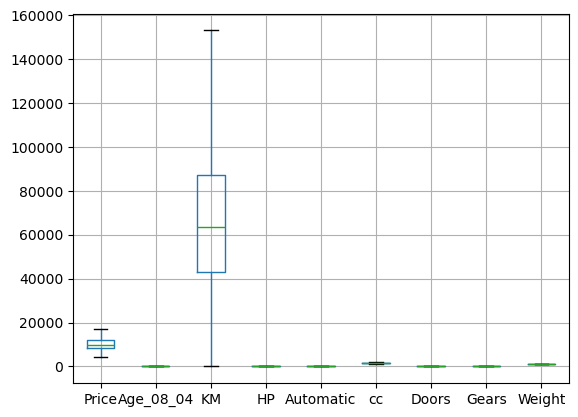

In [21]:
# boxplot after removing the outliers
df.boxplot()

## Transformation

In [23]:
# converting the categorical column (Fuel_Type) into numerical column
# creating dummy variables for Fuel_Type column
df= pd.get_dummies(df,columns=['Fuel_Type'],dtype= int)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3.0,5.0,1152.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500.0,69.0,20544.0,86.0,0.0,1300.0,3.0,5.0,1025.0,0,0,1
1431,10845.0,72.0,19000.0,86.0,0.0,1300.0,3.0,5.0,1015.0,0,0,1
1432,8500.0,71.0,17016.0,86.0,0.0,1300.0,3.0,5.0,1015.0,0,0,1
1433,7250.0,70.0,16916.0,86.0,0.0,1300.0,3.0,5.0,1015.0,0,0,1


In [24]:
# Summary Statistics after outlier removal and data transformation
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.000000,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,0.0,1558.327526,4.032753,5.0,1068.520906,0.011847,0.107317,0.880836
std,2977.598549,18.529725,34725.393258,13.146145,0.0,168.788311,0.952667,0.0,37.722708,0.108234,0.309624,0.324094
min,4350.000000,5.000000,1.000000,69.000000,0.0,1300.000000,2.000000,5.0,1000.000000,0.000000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.0,1400.000000,3.000000,5.0,1040.000000,0.000000,0.000000,1.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.0,1600.000000,4.000000,5.0,1070.000000,0.000000,0.000000,1.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.0,1600.000000,5.000000,5.0,1085.000000,0.000000,0.000000,1.000000
max,17200.000000,80.000000,153103.750000,140.000000,0.0,1900.000000,5.000000,5.0,1152.500000,1.000000,1.000000,1.000000


## Scalling of the data

In [26]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x= sc.fit_transform(df)
x

array([[ 1.00923034, -1.7811293 , -0.59511845, ..., -0.109493  ,
         2.88412583, -2.71878886],
       [ 1.09321988, -1.7811293 ,  0.15246263, ..., -0.109493  ,
         2.88412583, -2.71878886],
       [ 1.16041152, -1.72714314, -0.74707753, ..., -0.109493  ,
         2.88412583, -2.71878886],
       ...,
       [-0.6705606 ,  0.81020616, -1.45847651, ..., -0.109493  ,
        -0.34672551,  0.36781083],
       [-1.09050834,  0.75622001, -1.46135725, ..., -0.109493  ,
        -0.34672551,  0.36781083],
       [-1.1912958 ,  1.08013694, -1.94863457, ..., -0.109493  ,
        -0.34672551,  0.36781083]])

In [27]:
df_Scaled = pd.DataFrame(x,columns=df.columns)
df_Scaled.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1.009230,-1.781129,-0.595118,-0.844145,0.0,2.024972,-1.084443,0.0,2.226997,-0.109493,2.884126,-2.718789
1,1.093220,-1.781129,0.152463,-0.844145,0.0,2.024972,-1.084443,0.0,2.226997,-0.109493,2.884126,-2.718789
2,1.160412,-1.727143,-0.747078,-0.844145,0.0,2.024972,-1.084443,0.0,2.226997,-0.109493,2.884126,-2.718789
3,1.496370,-1.619171,-0.565908,-0.844145,0.0,2.024972,-1.084443,0.0,2.226997,-0.109493,2.884126,-2.718789
4,1.093220,-1.403226,-0.839578,-0.844145,0.0,2.024972,-1.084443,0.0,2.226997,-0.109493,2.884126,-2.718789


In [28]:
# summary of data after scalling 
df_Scaled.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1.435000e+03,1.435000e+03,1.435000e+03,1.435000e+03,1435.0,1.435000e+03,1.435000e+03,1435.0,1.435000e+03,1.435000e+03,1.435000e+03,1.435000e+03
mean,-3.961214e-17,7.922428e-17,3.961214e-17,-5.298124e-16,0.0,-5.149578e-16,2.277698e-16,0.0,-2.059831e-15,-4.456366e-17,-3.961214e-17,1.386425e-16
std,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00,0.0,1.000349e+00,1.000349e+00,0.0,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00
min,-2.064787e+00,-2.752880e+00,-1.948635e+00,-2.442128e+00,0.0,-1.531016e+00,-2.134494e+00,0.0,-1.817070e+00,-1.094930e-01,-3.467255e-01,-2.718789e+00
25%,-6.873585e-01,-6.474200e-01,-7.099448e-01,-8.441446e-01,0.0,-9.383512e-01,-1.084443e+00,0.0,-7.563309e-01,-1.094930e-01,-3.467255e-01,3.678108e-01
50%,-2.002191e-01,2.703446e-01,-1.208045e-01,6.777443e-01,0.0,2.469780e-01,-3.439192e-02,0.0,3.922332e-02,-1.094930e-01,-3.467255e-01,3.678108e-01
75%,4.884951e-01,7.562200e-01,5.587767e-01,6.777443e-01,0.0,2.469780e-01,1.015659e+00,0.0,4.370004e-01,-1.094930e-01,-3.467255e-01,3.678108e-01
max,2.252276e+00,1.296082e+00,2.461859e+00,2.960578e+00,0.0,2.024972e+00,1.015659e+00,0.0,2.226997e+00,9.133004e+00,2.884126e+00,3.678108e-01


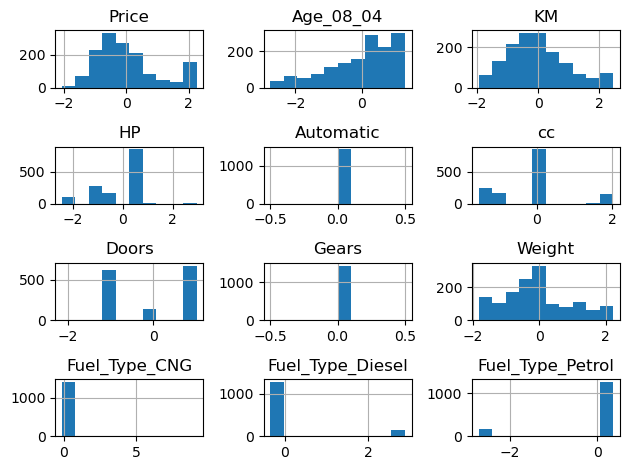

In [29]:
# visualisation 
# Histogram
df_Scaled.hist()
plt.tight_layout()

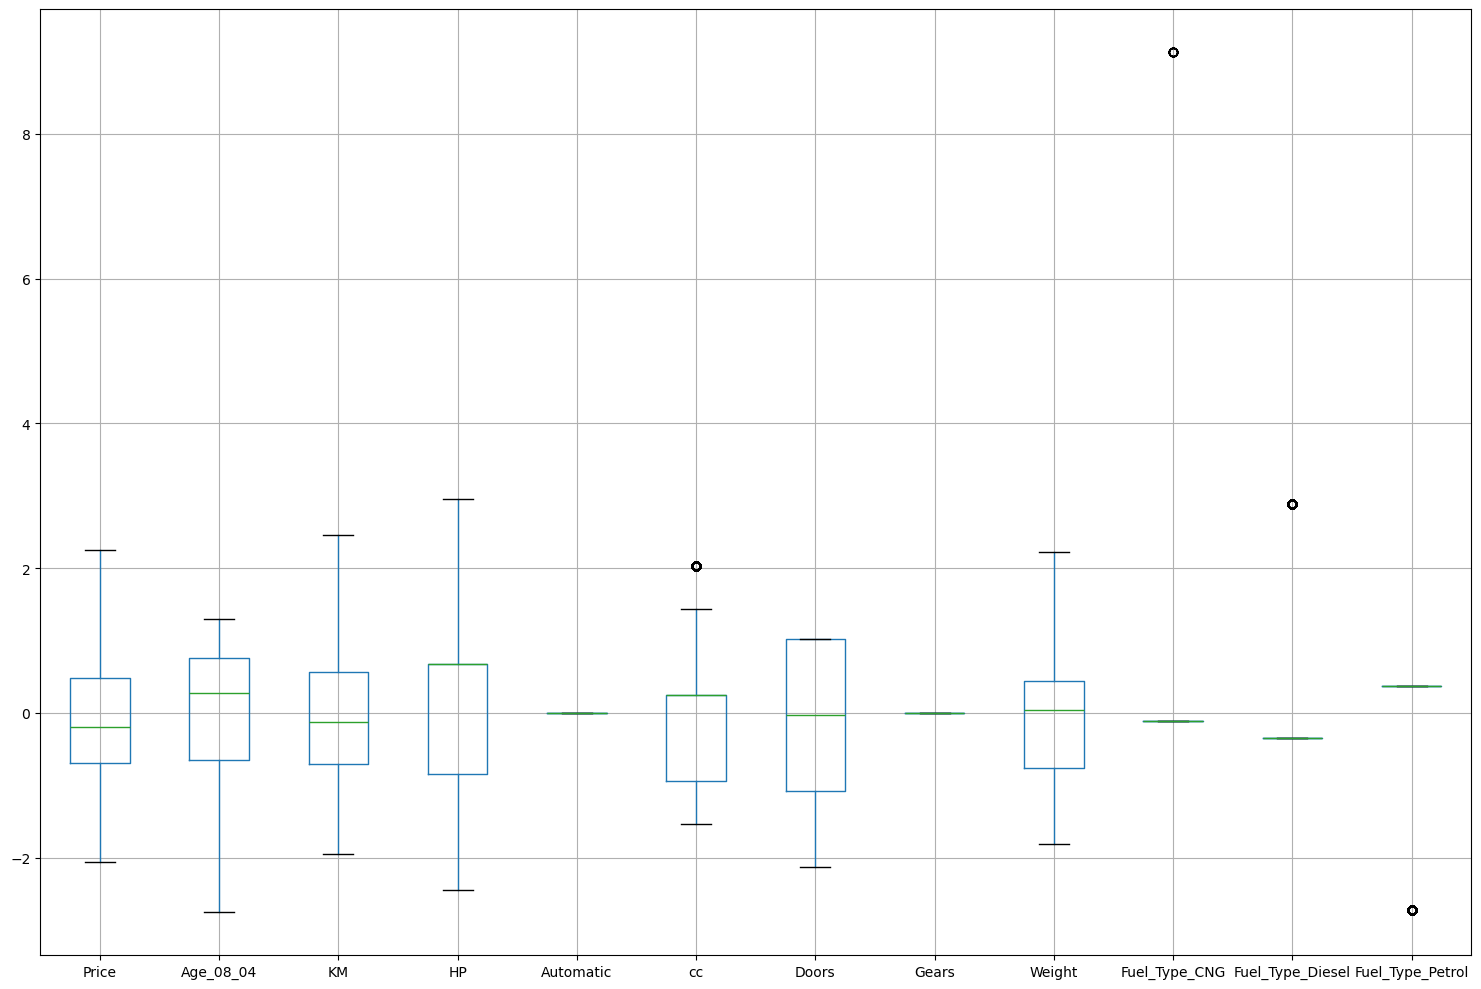

In [30]:
# boxplot
plt.figure(figsize=(15,10))
df_Scaled.boxplot()
plt.tight_layout()

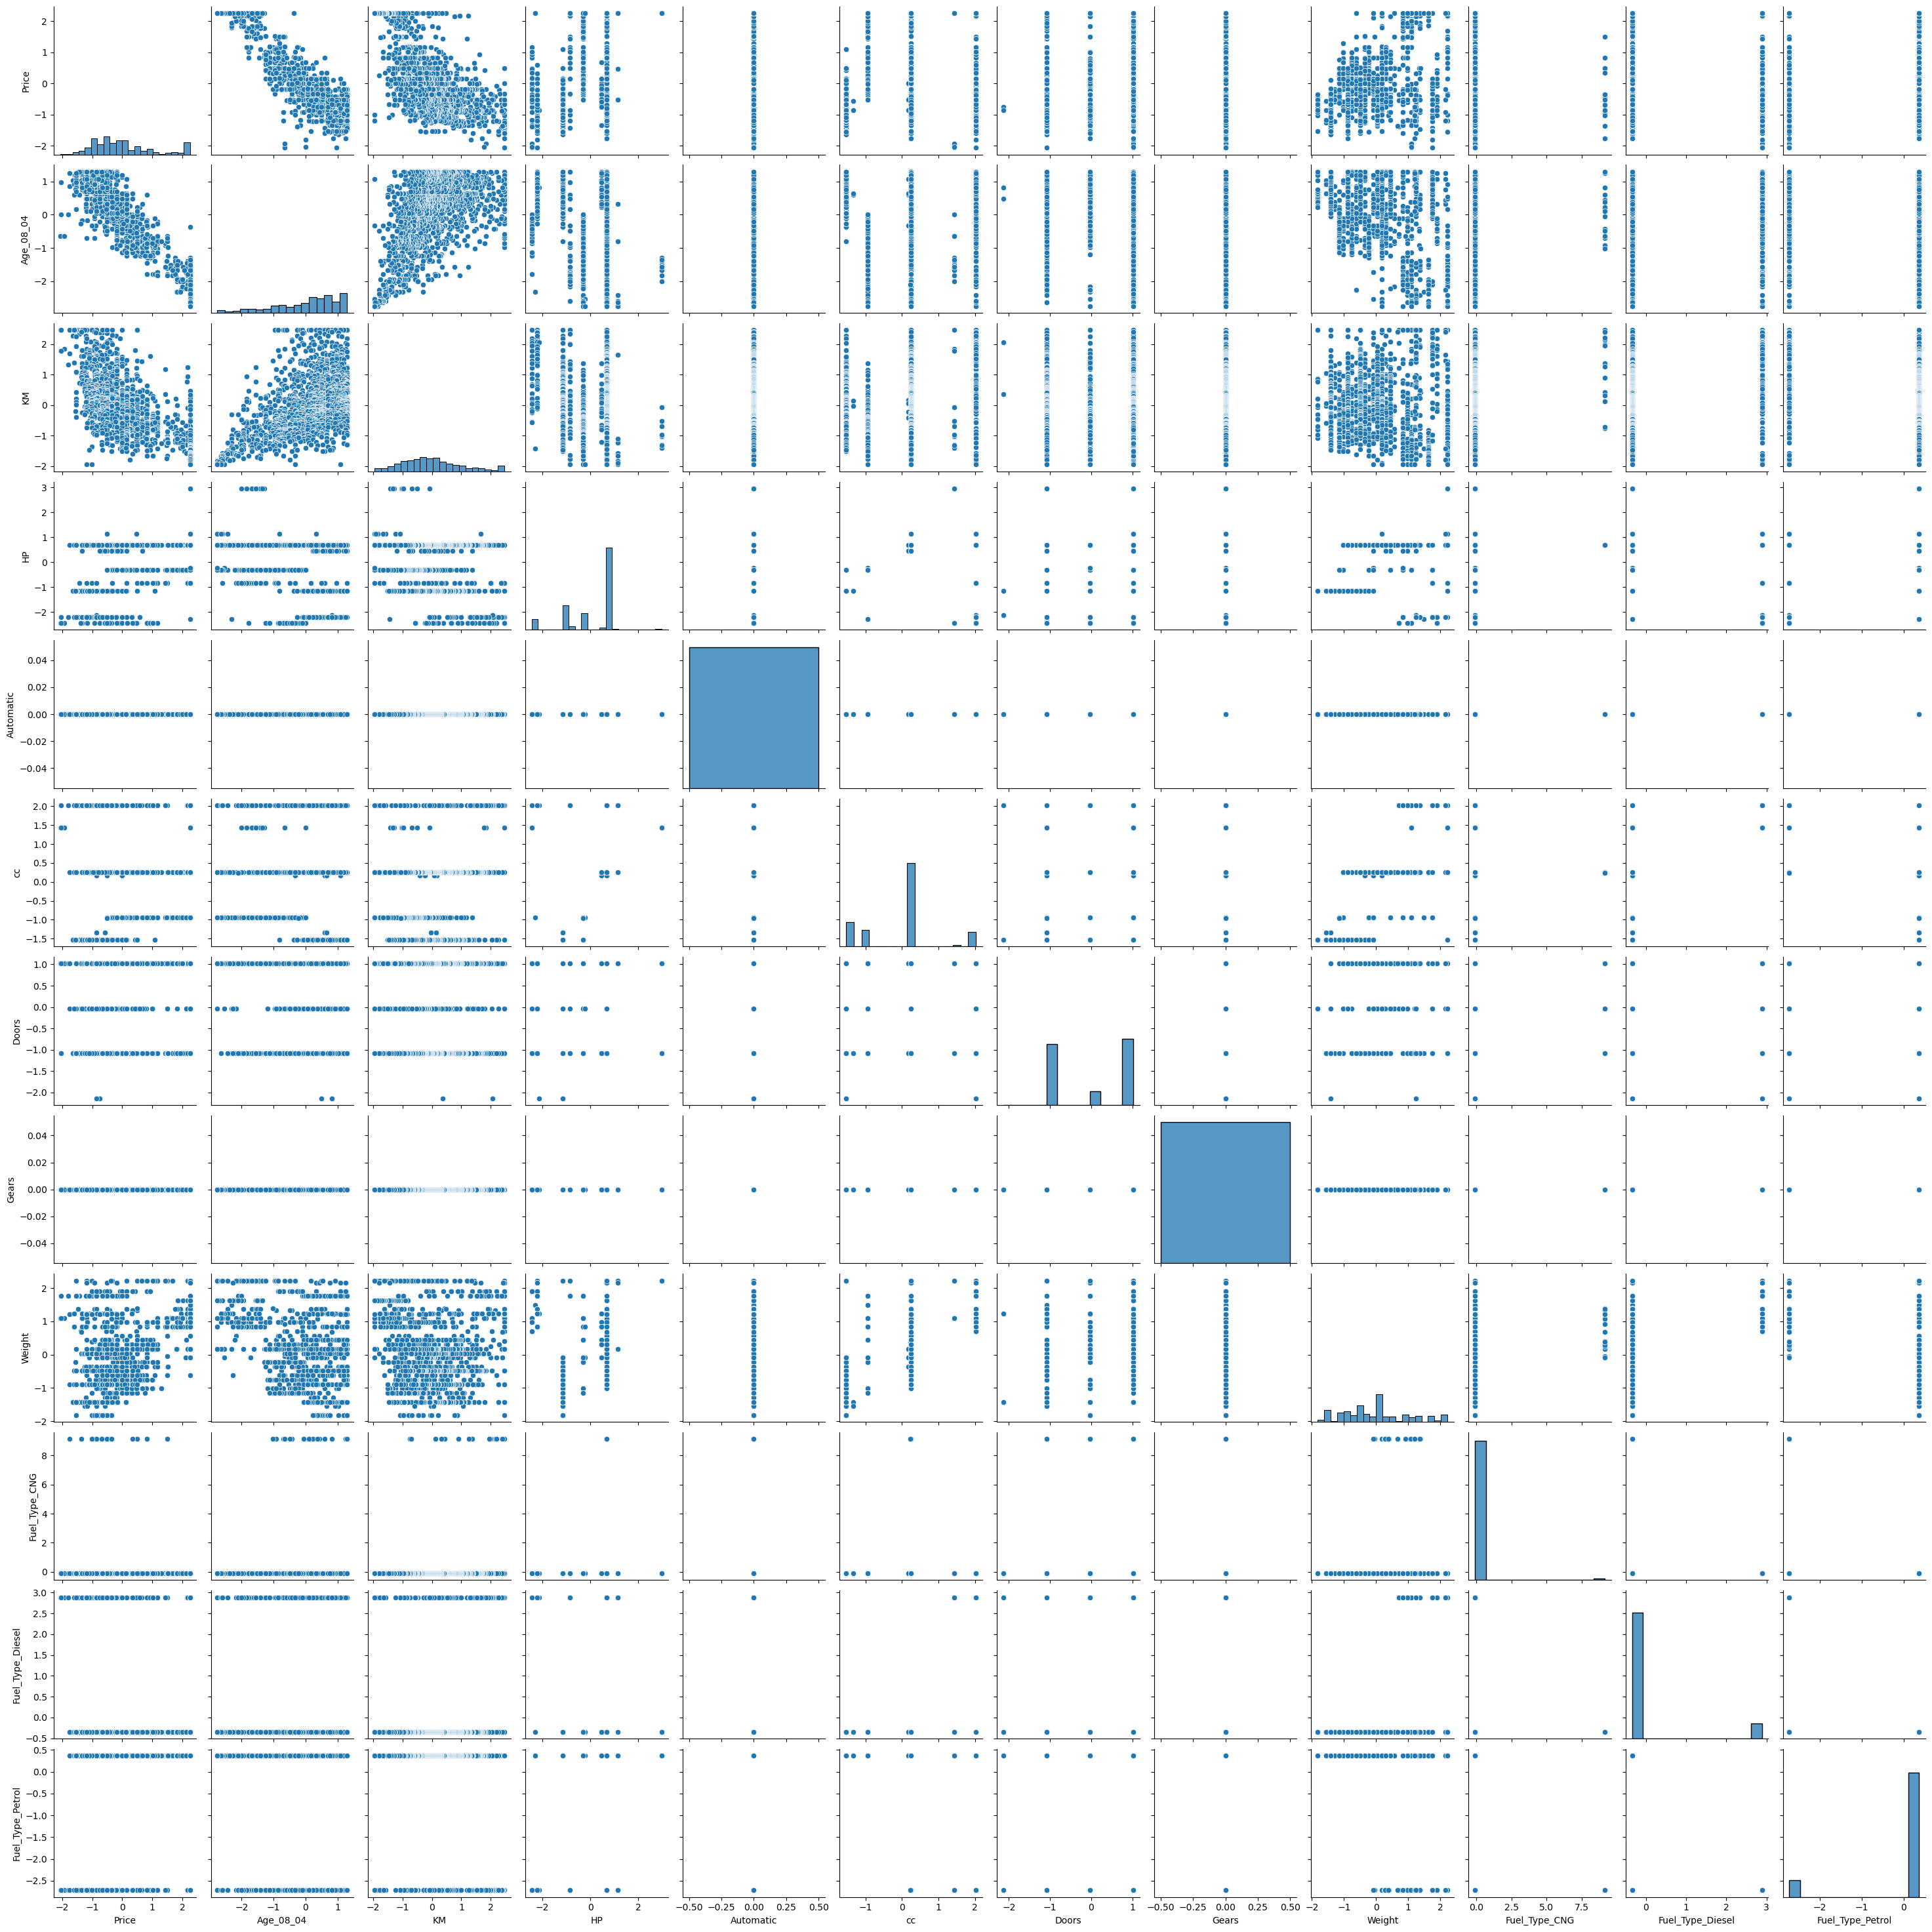

In [31]:
# pairplot
sns.pairplot(df_Scaled)

In [32]:
# correlation between the columns
df_Scaled.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.895340,-0.607949,0.254427,NaN,0.129352,0.183010,NaN,0.507823,-0.039536,-0.001579,0.014712
Age_08_04,-0.895340,1.000000,0.530670,-0.129602,NaN,-0.136644,-0.146704,NaN,-0.476150,0.002132,-0.093084,0.088216
KM,-0.607949,0.530670,1.000000,-0.329729,NaN,0.258680,-0.036618,NaN,0.000977,0.143608,0.376921,-0.408052
HP,0.254427,-0.129602,-0.329729,1.000000,NaN,0.098192,0.120139,NaN,0.024877,0.074208,-0.601584,0.549942
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.129352,-0.136644,0.258680,0.098192,NaN,1.000000,0.138433,NaN,0.717782,0.026966,0.698106,-0.675943
Doors,0.183010,-0.146704,-0.036618,0.120139,NaN,0.138433,1.000000,NaN,0.381177,0.009761,0.023538,-0.025746
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.507823,-0.476150,0.000977,0.024877,NaN,0.717782,0.381177,NaN,1.000000,0.085083,0.574681,-0.577437
Fuel_Type_CNG,-0.039536,0.002132,0.143608,0.074208,NaN,0.026966,0.009761,NaN,0.085083,1.000000,-0.037964,-0.297688


## model Building

In [34]:
# output variable = price
# input variable= Age_08_04,KM,HP, Weight (as the correlation coffeicient is significant for these columns)
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+Weight',data=df_Scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     2151.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:49:55   Log-Likelihood:                -638.19
No. Observations:                1435   AIC:                             1286.
Df Residuals:                    1430   BIC:                             1313.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.897e-17      0.010  -6.91e-15      1.000      -0.020       0.020
Age_08_04     -0.6832      0.014    -47.781      0.000      -0.711      -0.655
KM            -0.2158      0.013    -16.354      0.000      -0.242      -0.190
HP             0.0902      0.011      8.498      0.000       0.069       0.111
Weight         0.1805      0.012     14.914      0.000       0.157       0.204
==============================================================================
Omnibus:                       93.035   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.957
Skew:                          -0.348   Prob(JB):                     2.88e-53
Kurtosis:                       4.888   Cond. No.                         2.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# coefficients
model.params

Intercept   -6.896874e-17
Age_08_04   -6.831575e-01
KM          -2.158430e-01
HP           9.022796e-02
Weight       1.805042e-01
dtype: float64

In [36]:
#p-values
model.pvalues

Intercept     1.000000e+00
Age_08_04    1.367332e-298
KM            3.042784e-55
HP            4.778459e-17
Weight        7.348506e-47
dtype: float64

# calculating VIF (variance inflation factor)
 it will measure the degree of multicolinearity between the independent variables in MLR

In [38]:
# rsq= r-squared value , calculating vif value for each column so whichever vif is high we can drop that column
rsq_Age= smf.ols('Age_08_04~KM+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df_Scaled).fit().rsquared
vif_Age = 1/(1-rsq_Age)

rsq_km= smf.ols('KM~Age_08_04+HP+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df_Scaled).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp= smf.ols('HP~Age_08_04+KM+Automatic+cc+Doors+Gears+Weight+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df_Scaled).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt= smf.ols('Weight~Age_08_04+KM+HP+Automatic+cc+Doors+Gears+Fuel_Type_CNG+Fuel_Type_Diesel+Fuel_Type_Petrol',data=df_Scaled).fit().rsquared
vif_wt = 1/(1-rsq_wt)


# storing vif values in dataframe
d1= {'Variables':['Age_08_04','KM','HP','Weight'],'VIF':[vif_Age,vif_km,vif_hp,vif_wt]}
vif_frame= pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,Age_08_04,2.181306
1,KM,2.015390
2,HP,10.104386
3,Weight,3.853438


# Residual Analysis
## Test for normality of residual values(Q-Q plot)

In [40]:
# predicted values
print(model.fittedvalues)
# actual values
print(df_Scaled.Price)

0       1.671061
1       1.509701
2       1.666979
3       1.554113
4       1.465659
          ...   
1430   -0.498821
1431   -0.647731
1432   -0.598514
1433   -0.561011
1434   -0.038458
Length: 1435, dtype: float64
0       1.009230
1       1.093220
2       1.160412
3       1.496370
4       1.093220
          ...   
1430   -1.006519
1431    0.117261
1432   -0.670561
1433   -1.090508
1434   -1.191296
Name: Price, Length: 1435, dtype: float64


In [41]:
# residual values/error
model.resid

0      -0.661831
1      -0.416481
2      -0.506568
3      -0.057743
4      -0.372439
          ...   
1430   -0.507698
1431    0.764992
1432   -0.072047
1433   -0.529498
1434   -1.152837
Length: 1435, dtype: float64

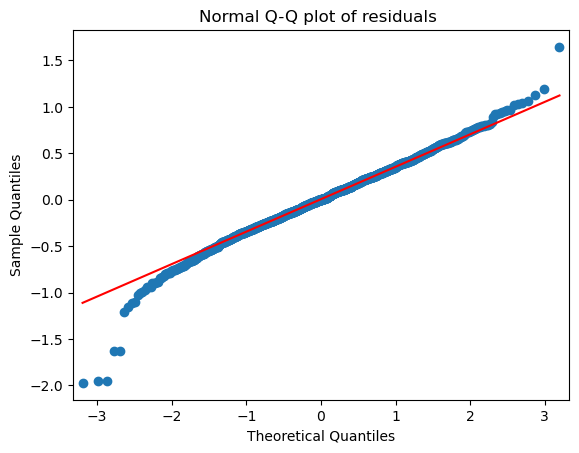

In [42]:
import statsmodels.api as sm
qqplot= sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q plot of residuals ')
plt.show()

(array([  5.,   0.,  15.,  87., 340., 563., 333.,  78.,  13.,   1.]),
 array([-1.97393845, -1.61192185, -1.24990524, -0.88788864, -0.52587203,
        -0.16385543,  0.19816117,  0.56017778,  0.92219438,  1.28421099,
         1.64622759]),
 <BarContainer object of 10 artists>)

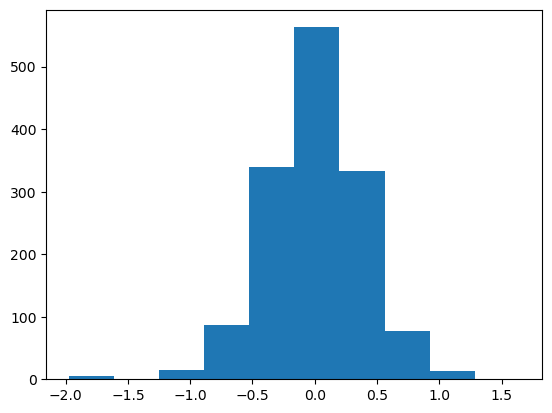

In [43]:
# histogram
plt.hist(model.resid)

In [44]:
# mean of residual values
np.mean(model.resid)

5.842790440396643e-16

# residual Plot

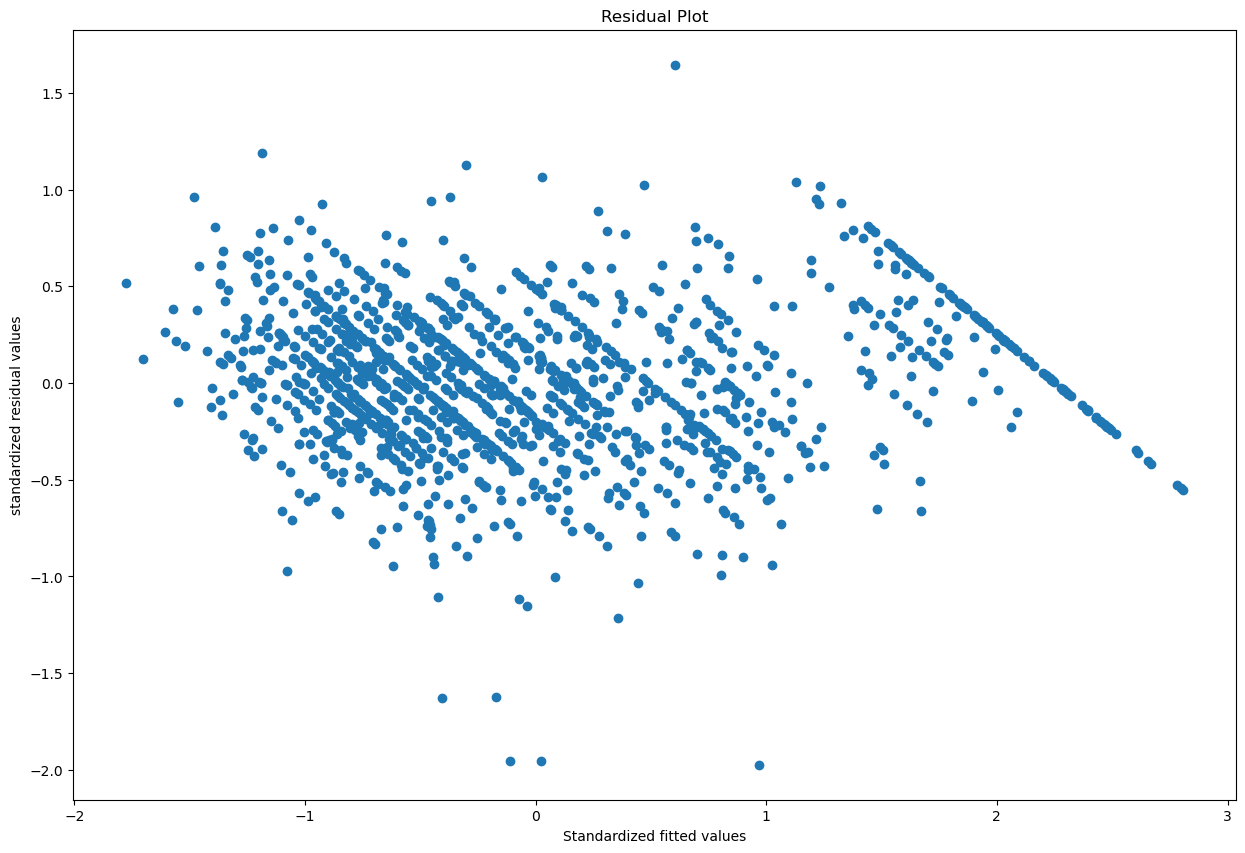

In [46]:
plt.figure(figsize=(15,10))
plt.scatter(model.fittedvalues,model.resid)
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

# residual vs regressor 

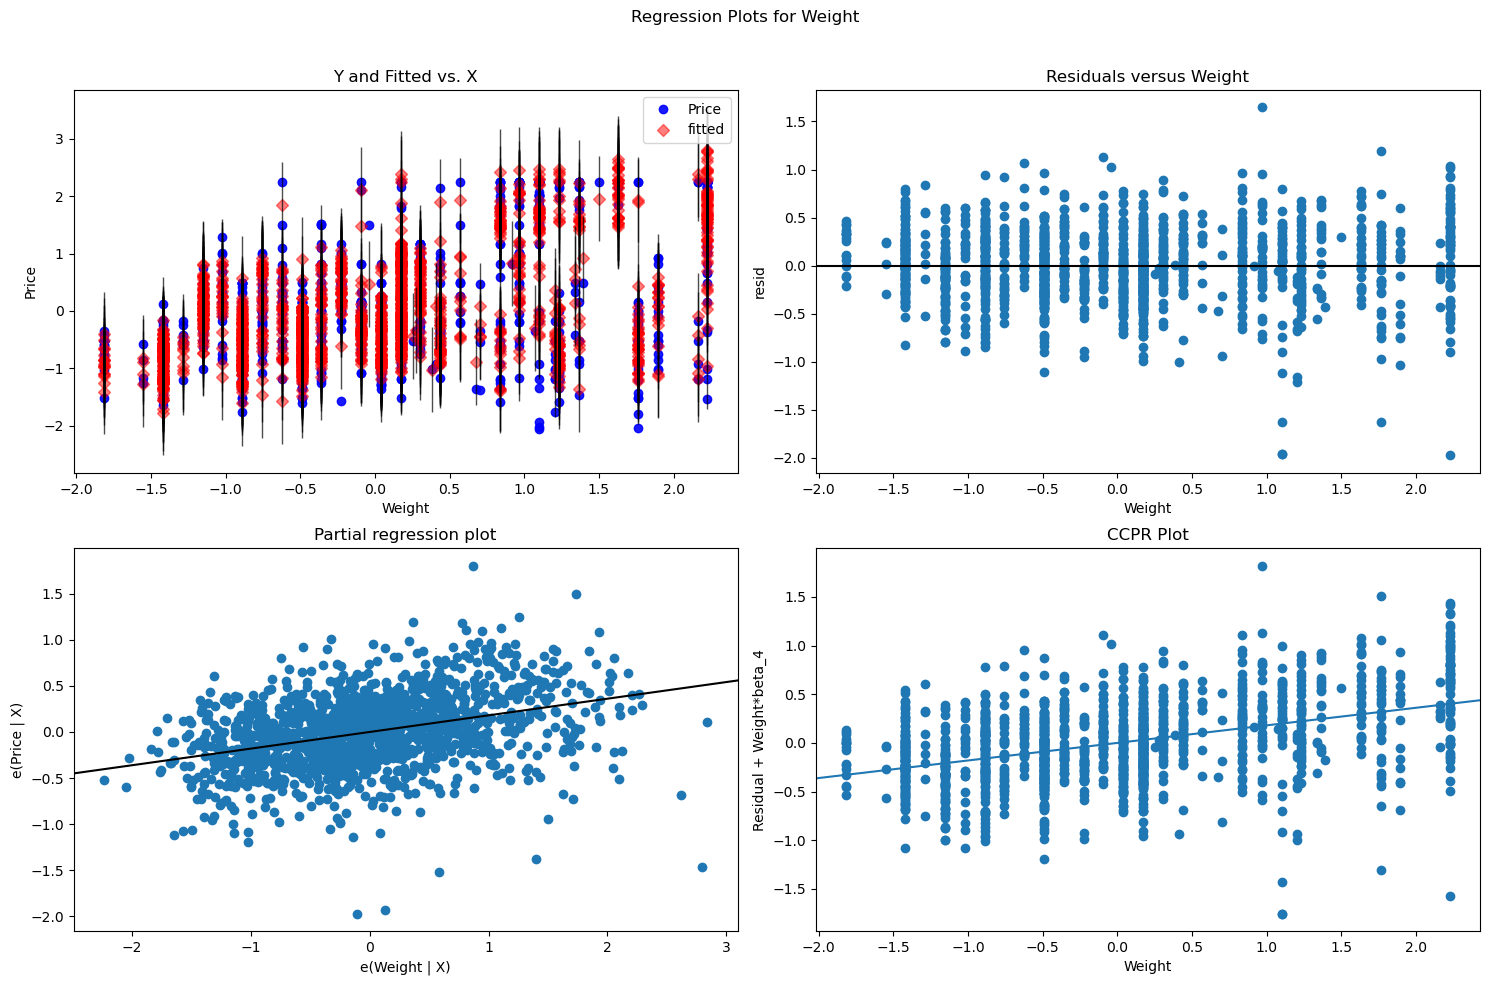

In [48]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Weight',fig=fig)

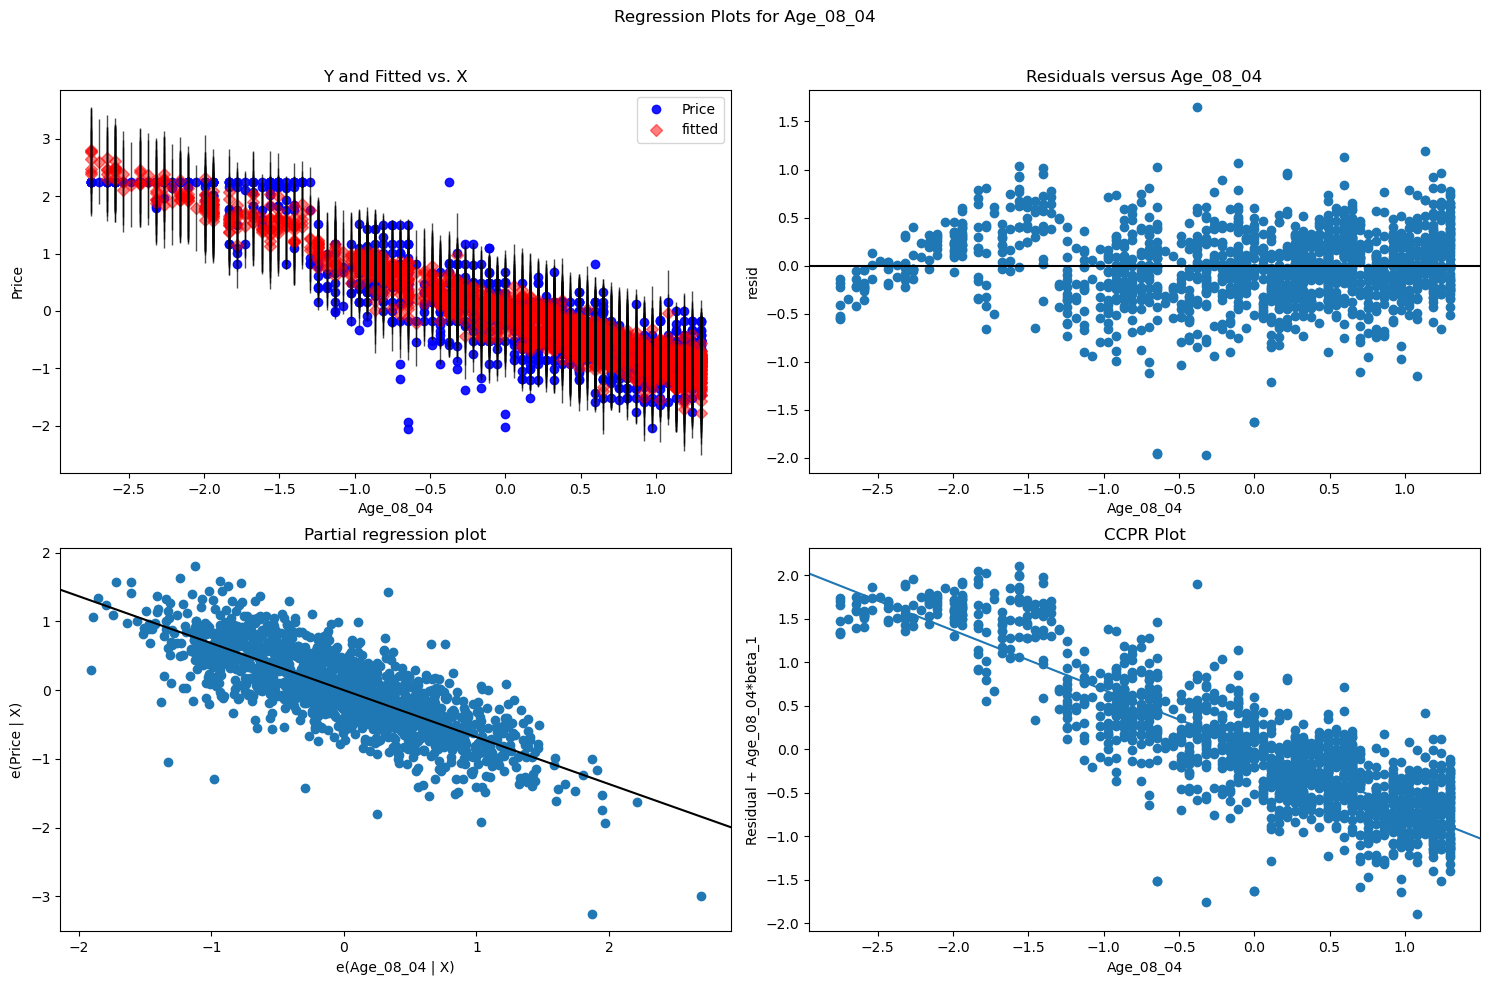

In [49]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)

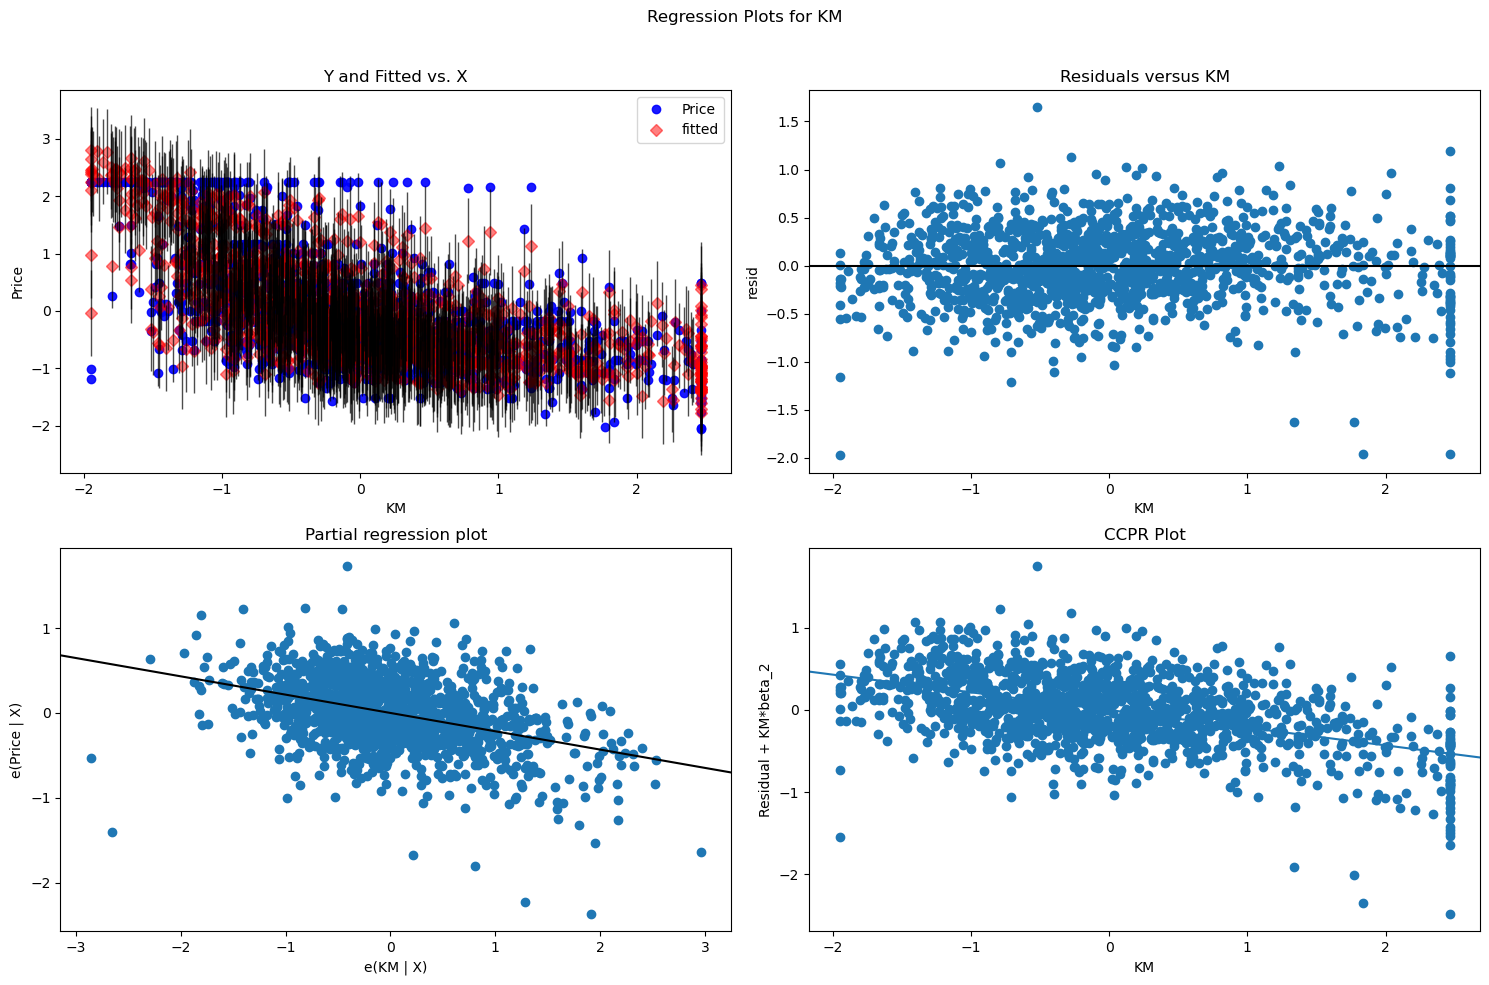

In [50]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'KM',fig=fig)

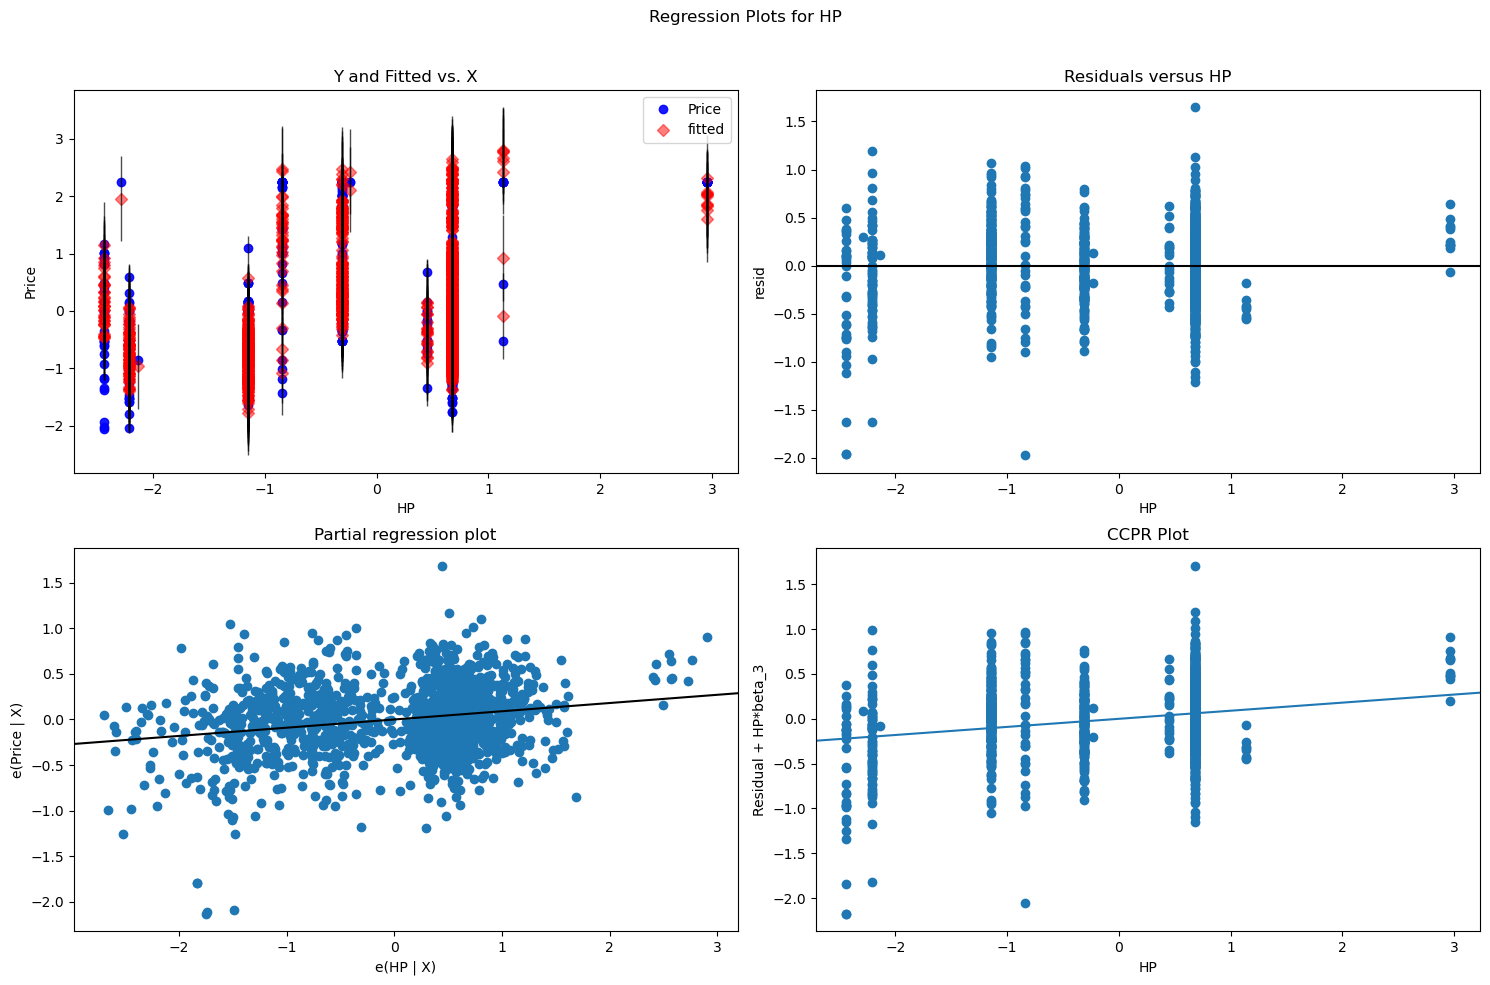

In [51]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)

# Detecting influencers / outliers
## cook's distance

In [53]:
# Cook's Distance
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c,_)= model_influence.cooks_distance

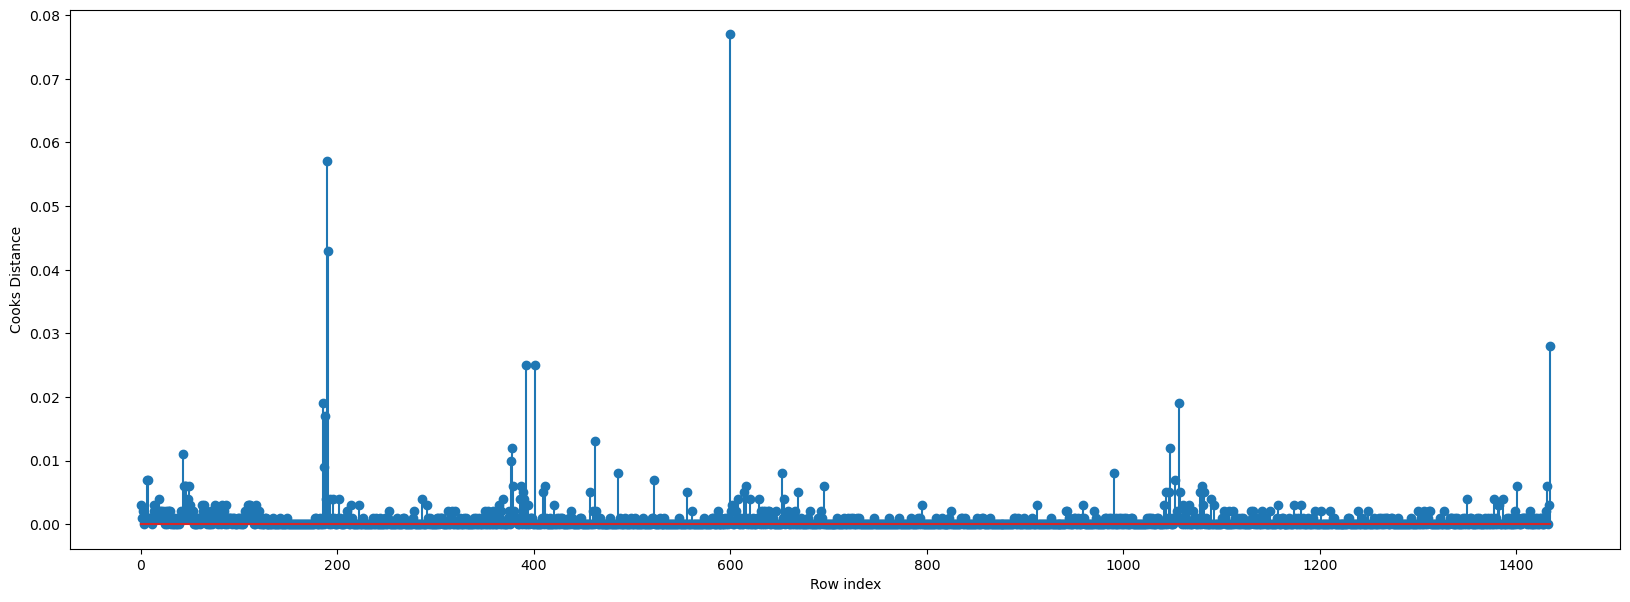

In [54]:
# plot the influencers values using stem plot
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_Scaled)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
# cooks distance is consider as high , if it is greater than 0.5 and extreme if it is greter than 1
# index and value of influence where c is maximum
(np.argmax(c),np.max(c))

(600, 0.07662988357925546)

As the cooks distance  is less than 0.5 no need to remove any point.

In [57]:
# build model again
# exclude variable 'HP' as the VIF value was more than 10 for it and generate R-squared and AIC values
# input variable= Age_08_04,KM,Weight 

import statsmodels.formula.api as smf
final_model = smf.ols('Price~Age_08_04+KM+Weight',data=df_Scaled).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     2709.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:49:59   Log-Likelihood:                -673.54
No. Observations:                1435   AIC:                             1355.
Df Residuals:                    1431   BIC:                             1376.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.897e-17      0.010  -6.74e-15      1.000      -0.020       0.020
Age_08_04     -0.6726      0.015    -46.089      0.000      -0.701      -0.644
KM            -0.2512      0.013    -19.574      0.000      -0.276      -0.226
Weight         0.1878      0.012     15.183      0.000       0.164       0.212
==============================================================================
Omnibus:                      137.728   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.437
Skew:                          -0.490   Prob(JB):                     5.54e-89
Kurtosis:                       5.416   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# r_squared value, AIC value, BIC value
final_model.rsquared, final_model.aic, final_model.bic

(0.8503040310388195, 1355.0748967470163, 1376.1505772597911)

(array([  5.,   0.,  10.,  64., 279., 601., 374.,  93.,   8.,   1.]),
 array([-2.131836  , -1.75006351, -1.36829103, -0.98651854, -0.60474606,
        -0.22297358,  0.15879891,  0.54057139,  0.92234388,  1.30411636,
         1.68588885]),
 <BarContainer object of 10 artists>)

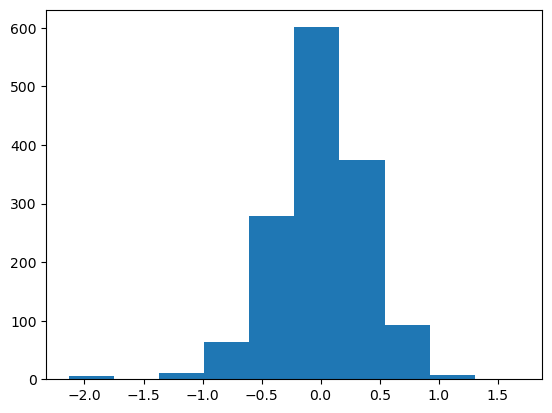

In [59]:
# histogram
plt.hist(final_model.resid)

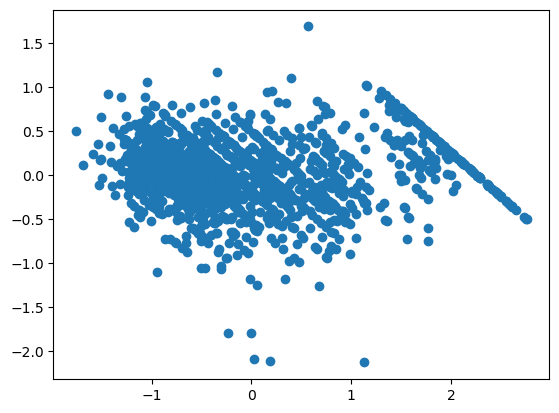

In [60]:
# scatter plot
plt.scatter(final_model.fittedvalues,final_model.resid)

# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [62]:
# splitting the data into feature (i/p) variables and target variable(o/p).
X_features= df_Scaled[['Age_08_04','KM','HP','Weight']]
X_features.head()

,Age_08_04,KM,HP,Weight
0,-1.781129,-0.595118,-0.844145,2.226997
1,-1.781129,0.152463,-0.844145,2.226997
2,-1.727143,-0.747078,-0.844145,2.226997
3,-1.619171,-0.565908,-0.844145,2.226997
4,-1.403226,-0.839578,-0.844145,2.226997


In [63]:
y_target= df_Scaled['Price']
y_target.head()

0    1.009230
1    1.093220
2    1.160412
3    1.496370
4    1.093220
Name: Price, dtype: float64

In [64]:
# Split the data into 80% training and 20% testing
train_X,test_X,train_y,test_y=train_test_split(X_features,y_target,test_size=0.2,random_state=1000)
print(len(df_Scaled)) # total data 
print(train_X.shape,test_X.shape)  # 80% training data,20% testing data
print(train_y.shape,test_y.shape)

# X_train, X_test will contain the features for training and testing
# y_train, y_test will contain the corresponding target variable values

1435
(1148, 4) (287, 4)
(1148,) (287,)


# 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [66]:
# First Model

# Add a constant to the model (intercept)
train_X_sm = sm.add_constant(train_X)

# Fit the model using statsmodels for easier interpretation of coefficients
model1 = sm.OLS(train_y, train_X_sm).fit()

# Print the summary of the model
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1672.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:49:59   Log-Likelihood:                -523.13
No. Observations:                1148   AIC:                             1056.
Df Residuals:                    1143   BIC:                             1081.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.011      0.104      0.9

In [67]:
# second model
# Drop a less significant variable (e.g. 'HP')
train_X_sm2 = train_X_sm.drop('HP', axis=1)

# Fit the second model
model2 = sm.OLS(train_y, train_X_sm2).fit()

# Print the summary of the model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     2099.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:49:59   Log-Likelihood:                -552.94
No. Observations:                1148   AIC:                             1114.
Df Residuals:                    1144   BIC:                             1134.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.012      0.178      0.8

In [68]:
# Third Model
# Create an interaction term between 'Age_08_04' and 'KM'
train_X_sm['Age_KM_Interaction'] = train_X_sm['Age_08_04'] * train_X_sm['KM']

# Fit the third model
model3 = sm.OLS(train_y, train_X_sm).fit()

# Print the summary of the model
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1351.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:49:59   Log-Likelihood:                -517.91
No. Observations:                1148   AIC:                             1048.
Df Residuals:                    1142   BIC:                             1078.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0195      0

if we compare the AIC, BIC, log-liklihood values for all the 3 above models, the least values of all 3 are for model3 ,
so we can say model3 is the best fitted for us.

# 4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [71]:

# Predict the target variable using the first model
test_X_sm = sm.add_constant(test_X)
y_pred1 = model1.predict(test_X_sm)

# Predict using the second model
test_X_sm2 = test_X_sm.drop('HP', axis=1)
y_pred2 = model2.predict(test_X_sm2)

# Predict using the third model 
test_X_sm['Age_KM_Interaction'] = test_X_sm['Age_08_04'] * test_X_sm['KM']
y_pred3 = model3.predict(test_X_sm)

In [72]:
# Evaluate the first model
mse1 = mean_squared_error(test_y, y_pred1)
rmse1 = mse1 ** 0.5
r2_1 = r2_score(test_y, y_pred1)

# Evaluate the second model
mse2 = mean_squared_error(test_y, y_pred2)
rmse2 = mse2 ** 0.5
r2_2 = r2_score(test_y, y_pred2)

# Evaluate the third model
mse3 = mean_squared_error(test_y, y_pred3)
rmse3 = mse3 ** 0.5
r2_3 = r2_score(test_y, y_pred3)

# Print the results
print(f"Model 1: MSE = {mse1}, RMSE = {rmse1}, R² = {r2_1}")
print(f"Model 2: MSE = {mse2}, RMSE = {rmse2}, R² = {r2_2}")
print(f"Model 3: MSE = {mse3}, RMSE = {rmse3}, R² = {r2_3}")

Model 1: MSE = 0.1301954954997596, RMSE = 0.360826129181022, R² = 0.8702028593988895
Model 2: MSE = 0.13506443756545916, RMSE = 0.3675111393760183, R² = 0.8653488146759565
Model 3: MSE = 0.12992346476563782, RMSE = 0.3604489766466786, R² = 0.8704740578094727


Evaluation: Lower MSE and RMSE indicate a better fit of the model to the test data.
Higher R² indicates that the model explains a greater proportion of the variance in the target variable.

# 5.Apply Lasso and Ridge methods on the model.

## Lasso Regression model

In [76]:
from sklearn.linear_model import Ridge, Lasso
X_features= df_Scaled[['Age_08_04','KM','HP','Weight']]
y_target= df_Scaled['Price']
train_X,test_X,train_y,test_y=train_test_split(X_features,y_target,test_size=0.2,random_state=1000)

# Lasso regression for training data
print("\n..............lasso model................\n")
lasso =  Lasso(alpha=0.1)
lasso.fit(train_X,train_y)
train_score_ls = lasso.score(train_X, train_y)
print("the train score for lasso model is {}".format(train_score_ls))

# Lasso regression for testing data
lasso_test_score = lasso.score(test_X,test_y)
print("The test score for lasso model is {}".format(lasso_test_score))


..............lasso model................

the train score for lasso model is 0.8288722720053013
The test score for lasso model is 0.8469430134748133


# Ridge Regression Model

In [78]:
# Ridge Regression model for training data
print("\n             Ridge Model ........\n")
ridgeReg =Ridge(alpha=0.1)
ridgeReg.fit(train_X, train_y)
train_score_ridge = ridgeReg.score(train_X,train_y)
print("the train score for Ridge model is {}".format(train_score_ridge))

# Ridge Regression for testing data
Ridge_test_score = ridgeReg.score(test_X,test_y)
print("The test score for Ridge Regression model is {}".format(Ridge_test_score))


             Ridge Model ........

the train score for Ridge model is 0.8540541416222597
The test score for Ridge Regression model is 0.8701995499702451


In [ ]:
# Check for multicollinearity using VIF
def calculate_vif(x):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = x.columns
    vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(X.shape[1])]
    return vif_data

vif = calculate_vif(pd.DataFrame(x, columns=x.columns))
print("Variance Inflation Factor (VIF):")
print(vif)


In [ ]:
# K-Fold Cross-Validation with Hyperparameter Tuning
param_grid = {"fit_intercept": [True, False], "normalize": [True, False]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(n_splits=5), scoring="r2")
grid_search.fit(train_X,train_y)


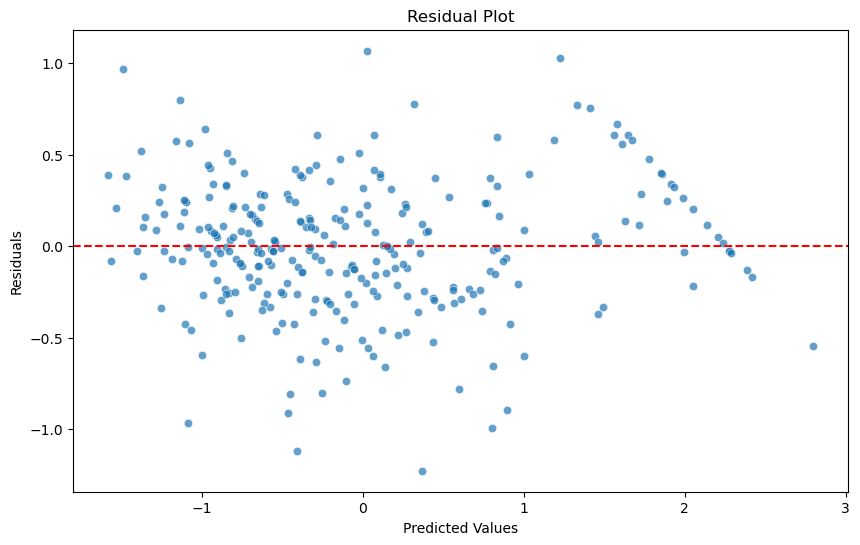

In [116]:
# Residual Plot
residuals = test_y - y_pred1
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred1, y=residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()